In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale as StandardScale

%matplotlib inline

In [115]:
# Download csv from https://www.ssb.no/befolkning/statistikker/folkemengde/aar-per-1-januar

kommunetall = pd.read_csv('befolkning.csv', sep=';')
kommunetall.drop(columns=['Unnamed: 4', '2018'], inplace=True)
kommunetall.drop(2, inplace=True)
kommunetall.dropna(inplace=True)

kommunetall['vekst'] = kommunetall['Folketilvekst i prosent'].str.replace(',', '.')
kommunetall['vekst'] = kommunetall['vekst'].astype(float)
kommunetall.drop(columns='Folketilvekst i prosent', inplace=True)


komnumm = kommunetall['Unnamed: 0'].str.split(' ', n=1, expand=True)
komnumm.columns = ['id', 'name']

kommunetall['id'] = komnumm['id']
kommunetall['name'] = komnumm['name']

kommunetall.drop('Unnamed: 0', axis=1, inplace=True)
kommunetall = kommunetall[kommunetall['id'].str.len() > 2] # Filter kun kommuner
kommunetall.set_index('id', inplace=True)
kommunetall.sample(5)

,2019,vekst,name
id,,,
1439,5970.0,-0.5,Vågsøy
0128,8230.0,0.3,Rakkestad
1101,14830.0,-0.5,Eigersund
1529,4764.0,1.8,Skodje
1112,3213.0,-0.7,Lund


In [378]:
# Downloaded from https://www.ssb.no/statbank/table/07459/tableViewLayout1/

age = pd.read_csv('aldersfordeling.csv', sep='\t', encoding="unicode_escape")
age = age.drop(columns='statistikkvariabel')


komnumm = age['region'].str.split(' ', n=1, expand=True)
komnumm.columns = ['id', 'name']

age['id'] = komnumm['id'].str.lstrip('K-')
age['name'] = komnumm['name']

age = age.drop('region', axis=1)
age_data = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
age.columns = age_data + ['id', 'name']
age[age_data] /= age[age_data].sum(axis=1)[:,None]

age.head(5)

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100+,id,name
0,0.103313,0.119768,0.126600,0.115534,0.133624,0.138500,0.120858,0.093563,0.038586,0.009526,0.000128,0101,Halden
1,0.106001,0.118438,0.110738,0.120607,0.143067,0.142272,0.115107,0.095826,0.039143,0.008678,0.000122,0104,Moss
2,0.112560,0.123417,0.119256,0.123935,0.140454,0.133596,0.112202,0.088737,0.037609,0.008143,0.000089,0105,Sarpsborg
3,0.106577,0.122157,0.124688,0.117351,0.139057,0.141687,0.117179,0.085800,0.038045,0.007350,0.000110,0106,Fredrikstad
4,0.078713,0.110241,0.079583,0.084801,0.126984,0.156338,0.190041,0.127419,0.037399,0.008263,0.000217,0111,Hvaler


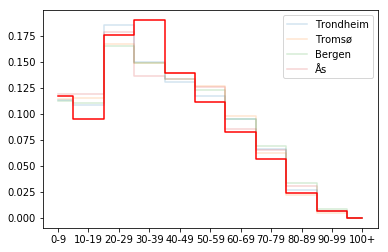

In [402]:
focus = 'Oslo'

X = age.drop(['name', 'id'], axis=1)

age_pca = PCA(n_components=5).fit(X)
X = age_pca.transform(X)

near_age = NearestNeighbors(n_neighbors=5).fit(X)
_, indices = near_age.kneighbors(X[age['name']==focus])

nearest = age.iloc[indices[0]]
nearest = nearest.set_index('name').T.drop('id')

plt.plot(nearest.drop(columns=focus), alpha=.2, drawstyle='steps-mid')
plt.plot(nearest[focus], c='r', drawstyle='steps-mid')

plt.legend(nearest.drop(columns=focus).columns)

In [364]:
X = age.drop(['name', 'id'], axis=1)
# X = X / X.sum(axis=1)

X.shape
pd.DataFrame(
    np.array(X) / np.full(X.shape[0], 2)[:,None]
)




1.0

['hello', 'this', 'is', 'two', 'columns']